<a href="https://colab.research.google.com/github/stogaja/Tanzanian-Water-Project/blob/main/TANZANIA_WATER_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. **Defining the Question** 

Tanzania is the largest country in East Africa, with a population of 52 million people. But of those 52 million people, 23 million have no choice but to drink dirty water from unsafe sources. 44 million do not have access to adequate sanitation and 4000 children die from preventable diseases due to unsafe water. Safe water is scarce, and often women and children have to spend two to seven hours collecting clean water (WaterAid, 2016). This is quite the predicament. Water is a basic need and right for all human beings. The Tanzanian Ministry of water agrees and together with Taarifa, they aim to improve sanitation conditions in their country.
Water is fundamental to life and the environment; it plays a central role in both, economic and social development activities. Water touches all the spheres of human life including domestic, livestock, fisheries, wildlife, industry and energy, recreation, and other social—economic activities. It plays a pivotal role in poverty alleviation through the enhancement of food security, domestic hygiene, and the environment. The availability of safe and clean water raises the standard of living while its inadequacy of it poses serious health risks and leads to a decline in the living standards and life expectancy. Major fresh water sources in Tanzania include lakes, rivers, streams, dams, and groundwater. However, these are not well distributed all over the country. Some areas lack both surface and groundwater sources. Increasing population growth and urbanization pose serious pressure on the quantity and quality of available water. The sustainability of the present and future human life and environment depends mainly on proper water resources management. 


### a) Specifying the Question

Water supply to different parts of Tanzania is mainly done through pipes dug underground, while this is an initiative to curb the water problem, over 24 million people are still impacted by the crisis, that’s almost half of the population. This has resulted in poor sanitation, lack of safe drinking water as well as overcrowding at water sources, the adverse effects include disease outbreaks and generally very slow economic growth. The project aims to solve these problems by predicting which pipes are operating well, which ones need repairs and which ones are not working at all, as optimally functioning pipes will mean smooth delivery of water to where its needed.

### b) Defining the Metric for Success

The project will be considered a success when we can classify pumps into 3 categories namely:

* functional : the waterpoint is operational and there are no repairs needed

* functional needs repair : the waterpoint is operational, but needs repairs

* non functional : the waterpoint is not operational

### c) Understanding the context

Water supply to different parts of Tanzania is mainly done through pipes dug underground, while this is an initiative to curb the water problem, over 24 million people are still impacted by the crisis, that’s almost half of the population. This has resulted in poor sanitation, lack of safe drinking water as well as overcrowding at water sources, the adverse effects include disease outbreaks and generally very slow economic growth. The project aims to solve these problems by predicting which pipes are operating well, which ones need repairs and which ones are not working at all, as optimally functioning pipes will mean smooth delivery of water to where its needed.

### d) Recording the Experimental Design

1. Data sourcing/loading
2. Data Understanding
3. Data Relevance
4. External Dataset Validation
5. Data Preparation
6. Univariate Analysis
7. Bivariate Analysis
8. Multivariate Analysis
9. Implementing the solution
10. Challenging the solution
11. Conclusion
12. Follow up questions

## e) Data Relevance

The data has been proven to be valid and was provided by the Tanzania Water Ministry

# **2. Importing Libraries.**

Installations

In [1]:
# !pip install category_encoders
# !pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 69 kB 3.6 MB/s 


In [93]:
# Importing the necessary libraries
#
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import category_encoders as ce
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import numpy as np
import os
from bokeh.io import output_notebook, push_notebook, show
from bokeh.models import (
    ColumnDataSource, GMapOptions, LinearColorMapper,
    FactorRange, ColorBar, BasicTicker, PrintfTickFormatter
)
from bokeh.palettes import Spectral3, Spectral6, Spectral7
from bokeh.plotting import figure
from bokeh.transform import factor_cmap
from bokeh.plotting import gmap
from bokeh.layouts import gridplot, row
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
output_notebook()
from sklearn.datasets import make_classification
from sklearn import tree
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

# default values to be used 
pd.options.display.max_columns=100
TOOLS="hover,crosshair,pan,wheel_zoom,zoom_in,zoom_out,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select,"
COLORS = ['#99d594', '#D53E4F', '#FC8D59']

#  **3. Reading the Data**

In [4]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Accessing working directory
os.chdir('/content/drive/Shared drives/Final Project Group 2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
#Loading the csv files
train_labels = pd.read_csv("Training set labels.csv")
train_values = pd.read_csv("Training set values.csv")
test_labels = pd.read_csv("Test set labels.csv")
test_values = pd.read_csv("Test set values.csv")

In [10]:
# Merging the Training dataset
training_data = train_labels.merge(train_values, left_on='id', right_on='id')
training_data.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [11]:
training_data.shape

(59400, 41)

In [12]:
# Merging the Testing dataset
testing_data = test_labels.merge(test_values, left_on='id', right_on='id')
testing_data.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,predicted label,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,Internal,Magoma,Manyara,21,3,Mbulu,Bashay,321,True,GeoData Consultants Ltd,Parastatal,NaN,True,2012,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,predicted label,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,Pangani,Kimnyak,Arusha,2,2,Arusha Rural,Kimnyaki,300,True,GeoData Consultants Ltd,VWC,TPRI pipe line,True,2000,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,predicted label,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,Internal,Msatu,Singida,13,2,Singida Rural,Puma,500,True,GeoData Consultants Ltd,VWC,P,NaN,2010,other,other,other,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,predicted label,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,Ruvuma / Southern Coast,Kipindimbi,Lindi,80,43,Liwale,Mkutano,250,NaN,GeoData Consultants Ltd,VWC,NaN,True,1987,other,other,other,vwc,user-group,unknown,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,predicted label,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,Ruvuma / Southern Coast,Losonga,Ruvuma,10,3,Mbinga,Mbinga Urban,60,NaN,GeoData Consultants Ltd,Water Board,BRUDER,True,2000,gravity,gravity,gravity,water board,user-group,pay monthly,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [13]:
testing_data.shape

(14850, 41)

In [14]:
# Combining training and testing dataset
# For purposes of cleaning and EDA
dataset = pd.concat([training_data, testing_data], ignore_index=True, sort=False)
dataset.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [15]:
dataset.shape

(74250, 41)

In [16]:
# Saving the dataset
dataset.to_csv("merged_dataset.csv")

In [17]:
# Reading the dataset
df = pd.read_csv("merged_dataset.csv")

## Exploring the data

In [18]:
#checking for shape 
# size of the dataset
print("The dataset consist of",df.shape[0], "rows and", df.shape[1], "columns")

The dataset consist of 74250 rows and 42 columns


In [19]:
#a preview of the data 
df.head()

,Unnamed: 0,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [20]:
#checking for colum names
df.columns

Index(['Unnamed: 0', 'id', 'status_group', 'amount_tsh', 'date_recorded',
       'funder', 'gps_height', 'installer', 'longitude', 'latitude',
       'wpt_name', 'num_private', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name',
       'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

* amount_tsh : Total static head (amount water available to waterpoint)

* date_recorded : The date the row was entered

* funder : Who funded the well

* gps_height : Altitude of the well

* installer : Organization that installed the well
* longitude : GPS coordinate

* latitude : GPS coordinate

* wpt_name : Name of the waterpoint if there is one

* num_private :Private use or not

* basin : Geographic water basin

* subvillage : Geographic location

* region : Geographic location

* region_code : Geographic location (coded)

* district_code : Geographic location (coded)

* lga : Geographic location

* ward : Geographic location

* population : Population around the well

* public_meeting : True/False

* recorded_by : Group entering this row of data

* scheme_management : Who operates the waterpoint

* scheme_name : Who operates the waterpoint

* permit : If the waterpoint is permitted

* construction_year : Year the waterpoint was constructed

* extraction_type : The kind of extraction the waterpoint uses

* extraction_type_group : The kind of extraction the waterpoint uses

* extraction_type_class : The kind of extraction the waterpoint uses

* management : How the waterpoint is managed

* management_group : How the waterpoint is managed

* payment : What the water costs

* payment_type : What the water costs

* water_quality : The quality of the water

* quality_group : The quality of the water

* quantity : The quantity of water
quantity_group : The quantity of water

* source : The source of the water

* source_type : The source of the water

* source_class : The source of the water

* waterpoint_type : The kind of waterpoint

* waterpoint_type_group : The kind of waterpoint

In [21]:
#cheking for data types if each columns 
df.dtypes

Unnamed: 0                 int64
id                         int64
status_group              object
amount_tsh               float64
date_recorded             object
funder                    object
gps_height                 int64
installer                 object
longitude                float64
latitude                 float64
wpt_name                  object
num_private                int64
basin                     object
subvillage                object
region                    object
region_code                int64
district_code              int64
lga                       object
ward                      object
population                 int64
public_meeting            object
recorded_by               object
scheme_management         object
scheme_name               object
permit                    object
construction_year          int64
extraction_type           object
extraction_type_group     object
extraction_type_class     object
management                object
management

#  **4. Data Preparation**

# Data Cleaning.

### a)Validity

In [22]:
# Preview sample of 100 records to see whether all records are appropiately ordered
df.sample(10)

,Unnamed: 0,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
26364,26364,16817,functional,1500.0,2013-03-25,Government Of Tanzania,1691,Government,37.896358,-4.361627,Kwenye Tank,0,Pangani,Kitunda,Kilimanjaro,3,3,Same,Suji,140,True,GeoData Consultants Ltd,Water authority,Hempanga water supply,True,2010,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
7610,7610,22659,non functional,0.0,2012-10-27,Dwe,0,DWE,32.172336,-4.933206,Mazengo,0,Lake Tanganyika,Mazengo,Tabora,14,4,Urambo,Songambele,0,True,GeoData Consultants Ltd,VWC,Songambele water supply,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,dry,dry,river,river/lake,surface,hand pump,hand pump
53285,53285,36061,functional,0.0,2011-07-22,Kaemp,0,KAEMP,31.723399,-1.401559,Kwa Muhabuki,0,Lake Victoria,Kambale,Kagera,18,2,Bukoba Rural,Bujugo,0,True,GeoData Consultants Ltd,VWC,NaN,True,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,enough,enough,spring,spring,groundwater,improved spring,improved spring
34699,34699,70880,functional,0.0,2013-01-28,Norad,1337,DWE,30.726221,-3.631311,Biturana Mashariki,0,Lake Tanganyika,Biturana Mashariki,Kigoma,16,1,Kibondo,Kibondo Urban,350,True,GeoData Consultants Ltd,VWC,NaN,True,1988,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,enough,enough,other,other,unknown,communal standpipe,communal standpipe
14689,14689,20783,functional,0.0,2011-02-26,Matimbwa Sec,-7,Ma,38.869047,-6.538348,Matimbwa Sec School,0,Wami / Ruvu,Ngogomoni,Pwani,6,1,Bagamoyo,Yombo,500,True,GeoData Consultants Ltd,Parastatal,NaN,False,2005,other,other,other,parastatal,parastatal,never pay,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,other,other
27651,27651,70954,functional,0.0,2013-03-28,World Vision,1552,KKKT Kilinga,36.834862,-3.312043,Baptist,0,Pangani,Bondeni,Arusha,2,7,Meru,Songoro,123,True,GeoData Consultants Ltd,VWC,Kyamara gravity water supply,True,1989,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
33743,33743,34087,functional,0.0,2012-10-15,Biore,0,WEDECO,34.172197,-3.579091,Mapera,0,Internal,Mabambasi,Shinyanga,17,6,Meatu,Ng'hoboko,0,True,GeoData Consultants Ltd,WUG,None,True,0,nira/tanira,nira/tanira,handpump,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
71652,71652,46128,predicted label,500.0,2013-02-25,Cdcg,680,DWE,36.207330,-11.297756,Kwa Fuko,0,Ruvuma / Southern Coast,Shuleni,Ruvuma,10,5,Namtumbo,Lusewa,400,True,GeoData Consultants Ltd,WUG,NaN,False,2001,other,other,other,wug,user-group,pay monthly,monthly,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump
9056,9056,30734,functional,0.0,2011-07-08,NaN,0,NaN,33.656558,-9.325395,Kwa Mzee Mwakapola,0,Lake Nyasa,Ushirika,Mbeya,12,4,Rungwe,Mpuguso,0,True,GeoData Consultants Ltd,VWC,K,NaN,0,gravity,gravity,gravity,vwc,user-group,never pay,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
52917,52917,72953,functional needs repair,0.0,2013-11-03,Government Of Tanzania,1567,Government,34.897989,-11.065663,Kwa Mzee Dismas,0,Ruvuma / Southern Coast,Kikwero,Ruvuma,10,3,Mbinga,Nyoni,68,NaN,GeoData Consultants Ltd,VWC,Government,True,2004,gravity,gravity,gravity,vwc,user-group,unknown,unknown,soft,g

In [23]:
# dropping unnecesary columns
df = df.drop(columns="Unnamed: 0")

### c) Uniformity

In [24]:
#checking if columns are properly named 
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

Columns have uniform naming.

### d) Completeness

In [25]:
# here we check for missing values 
# Dealing with missing values 
# Checking the mumber of missing values by column and sorting for the smallest

Total = df.isnull().sum().sort_values(ascending=False)

# Calculating percentages
percent_1 = df.isnull().sum()/df.isnull().count()*100

# rounding off to one decimal point
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)

# creating a dataframe to show the values
missing_data = pd.concat([Total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
scheme_name,35258,47.5
scheme_management,4846,6.5
installer,4532,6.1
funder,4504,6.1
public_meeting,4155,5.6
permit,3793,5.1
subvillage,470,0.6
source,0,0.0
management,0,0.0
waterpoint_type,0,0.0


In [26]:
# let's replace the 0 from the construction year  with and arbitrarily selected year 1993

df['construction_year'] = df['construction_year'].replace({0:1993})
df['age'] = df['date_recorded'].astype(str).str[:4].astype(int) - df['construction_year']
df['pop/year'] = df['population'].replace({0:1}) / df['age'].replace({0:1})

The cleaned construction year enables us to engineer a pump and the average population served per year feature.

In [27]:
# we impute the missing values with the string "No Record"
df.scheme_name= df.scheme_name.fillna('No Record')
df.scheme_management = df.scheme_management.fillna('No Record')
df.installer = df.installer.fillna('No Record')
df.funder = df.funder.fillna('No Record')
df.public_meeting = df.public_meeting.fillna('No Record')
df.permit = df.permit.fillna('No Record')
df.subvillage = df.subvillage.fillna('No Record')

In [28]:
# Checking for missing values
print(df.isnull().sum())

id                       0
status_group             0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
scheme_name              0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
s

### e) Consistency

In [29]:
# Check for duplicates
df.duplicated().sum()

0

No duplicate rows were found in our data set

# Exploratory Data Analysis

## a)Univariate analysis.

In [30]:
# let's get a brief description of the data

df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year,age,pop/year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1995.517077,16.401481,36.575821
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,10.200195,10.171738,203.478012
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,1960.000000,-7.000000,-900.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,1993.000000,8.000000,0.055556
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1993.000000,18.000000,1.666667
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000,19.000000,20.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000,53.000000,10166.666667


In [31]:
# let's get unique values for status group of the pumps

label_vc = df['status_group'].value_counts()
label_vc


functional                 32259
non functional             22824
predicted label            14850
functional needs repair     4317
Name: status_group, dtype: int64

In [32]:
plt.figure(figsize=(2, 2))

<Figure size 144x144 with 0 Axes>

<Figure size 144x144 with 0 Axes>

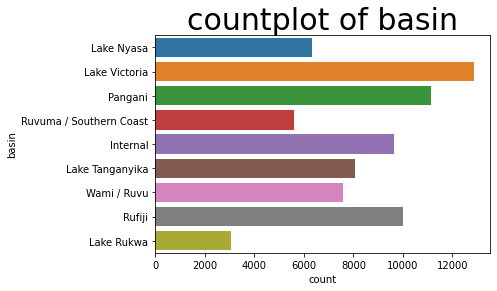

<Figure size 288x288 with 0 Axes>

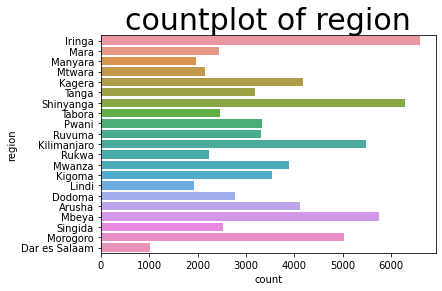

<Figure size 288x288 with 0 Axes>

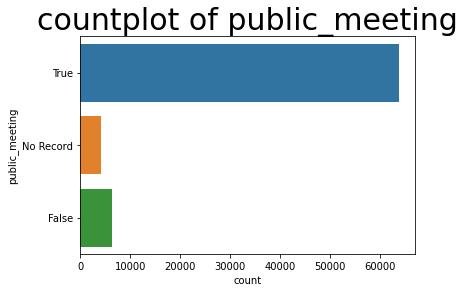

<Figure size 288x288 with 0 Axes>

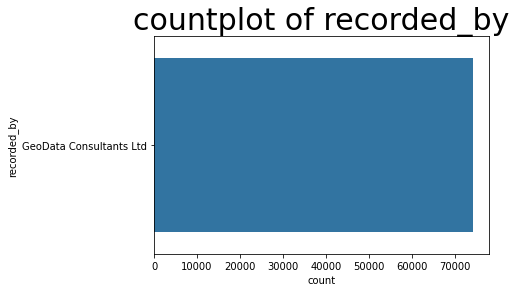

<Figure size 288x288 with 0 Axes>

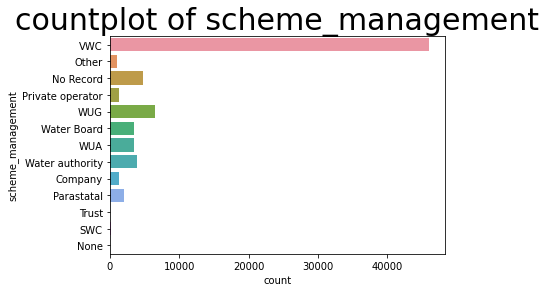

<Figure size 288x288 with 0 Axes>

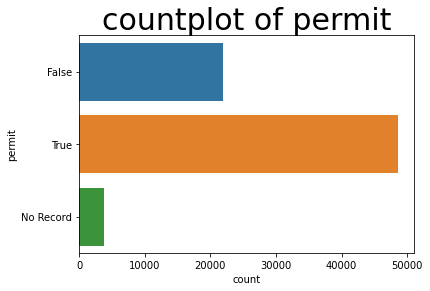

<Figure size 288x288 with 0 Axes>

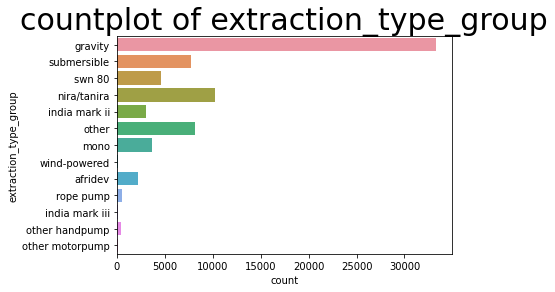

<Figure size 288x288 with 0 Axes>

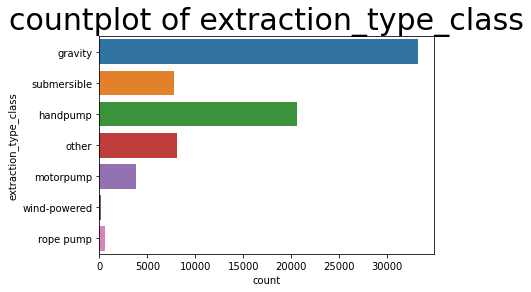

<Figure size 288x288 with 0 Axes>

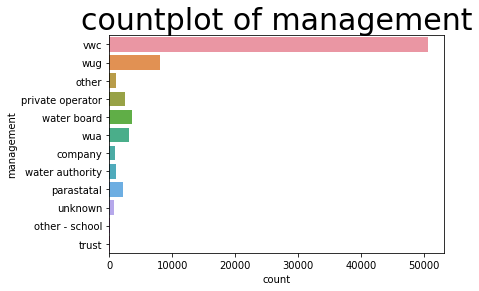

<Figure size 288x288 with 0 Axes>

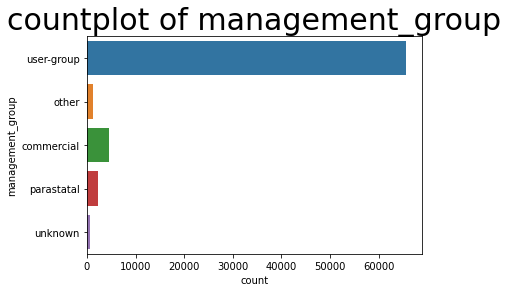

<Figure size 288x288 with 0 Axes>

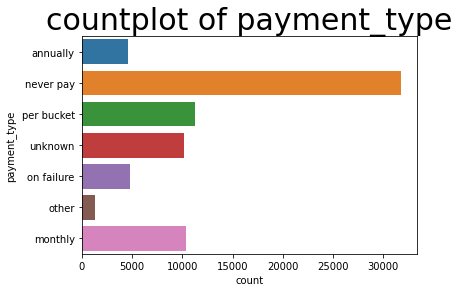

<Figure size 288x288 with 0 Axes>

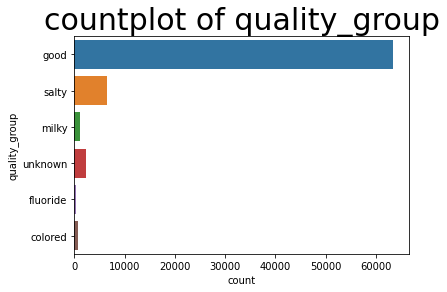

<Figure size 288x288 with 0 Axes>

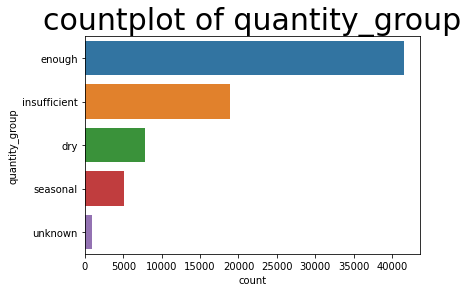

<Figure size 288x288 with 0 Axes>

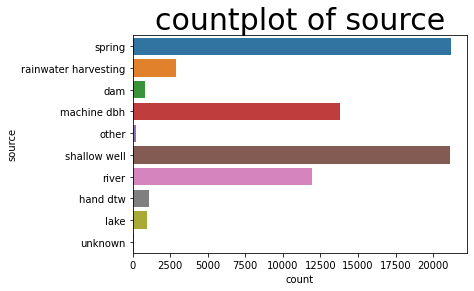

<Figure size 288x288 with 0 Axes>

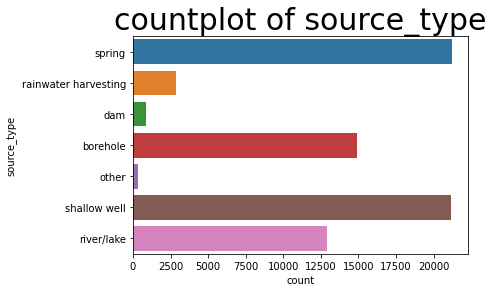

<Figure size 288x288 with 0 Axes>

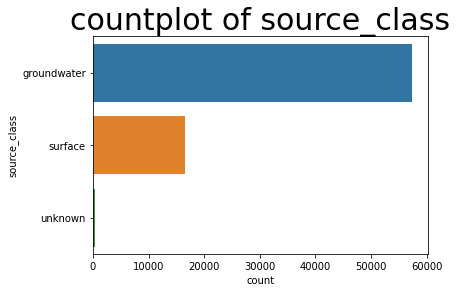

<Figure size 288x288 with 0 Axes>

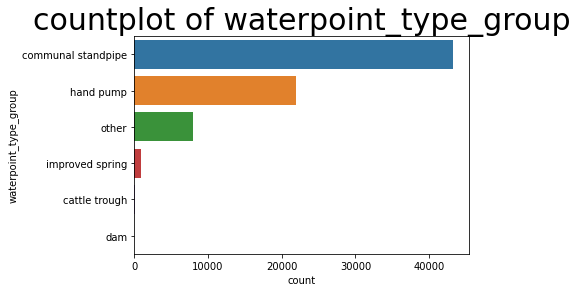

<Figure size 288x288 with 0 Axes>

In [33]:
# selecting object datatypes columns

categorical = ['basin', 'region', 
         'public_meeting', 'recorded_by',
       'scheme_management', 'permit',
       'extraction_type_group', 'extraction_type_class',
       'management', 'management_group',  'payment_type',
        'quality_group', 'quantity_group',
       'source', 'source_type', 'source_class', 
       'waterpoint_type_group']
categorical

# lets make a for loop to make countplots for our categorical variables.
for col in categorical:
  ax=sns.countplot(y=col,data=df)
  plt.title(f"countplot of {col}", fontsize = 30)
  plt.show(plt.figure(figsize=(4, 4)))


## b)Bivariate analysis

In [34]:
# let's get maximum and minimum values for latitude and longitude
BBox = ((
    df[df['longitude']!=0].longitude.min(),
    df.longitude.max(),      
    df.latitude.min(),
    df.latitude.max()
))
BBox

(29.6071219, 40.34519307, -11.64944018, -2e-08)

<Figure size 2448x2160 with 0 Axes>

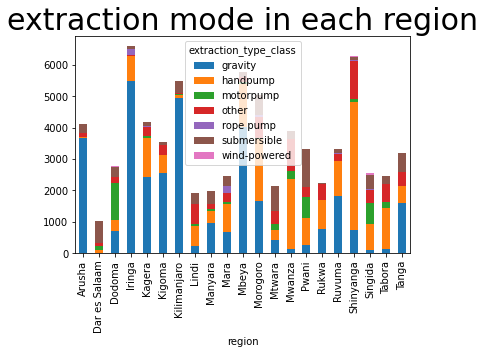

<Figure size 288x288 with 0 Axes>

In [35]:
#creating a crosstab 
crosstb=pd.crosstab(df.region,df.extraction_type_class)

#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("extraction mode in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Plot above shows region and most used mode of extraction on the water pumps



<Figure size 2160x1800 with 0 Axes>

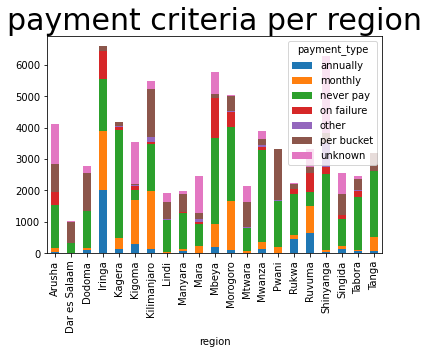

<Figure size 288x288 with 0 Axes>

In [36]:
#creating a crosstab 
crosstb=pd.crosstab(df.region,df.payment_type)

#creating a bar plot
plt.figure(figsize=(30,25))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("payment criteria per region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Plot above shows how pple pay for their water ,we can see that in Dar es salaam and mtwara payment per backet is almost more common than never pay ,meaning its harder to get free water than all other places.

<Figure size 2448x2160 with 0 Axes>

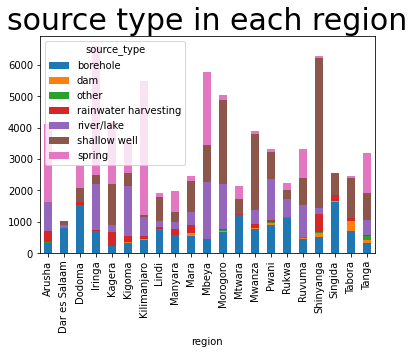

<Figure size 288x288 with 0 Axes>

In [37]:
#creating a crosstab 
crosstb=pd.crosstab(df.region,df.source_type)

#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("source type in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Springs seem to be a commomn source across the regions followed by shallow well and river/lake and boreholes.
The city Dar es salam seems to have very few water sources.

In [38]:
srt_1=df.sort_values('region',ascending=False)

In [39]:
srt_2=df.sort_values('management_group',ascending=False)

<Figure size 2448x2160 with 0 Axes>

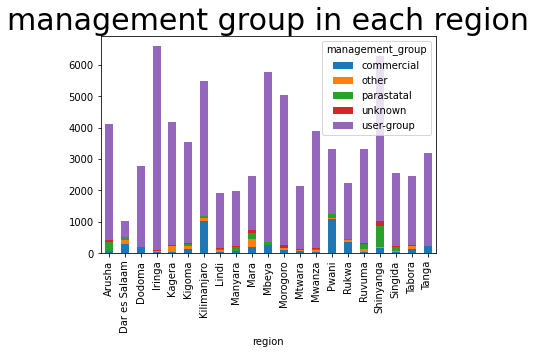

<Figure size 288x288 with 0 Axes>

In [40]:
#df.sort_values('arrival_date_month',ascending=False)
#creating a crosstab 
crosstb=pd.crosstab(srt_1.region,srt_2.management_group)
#creating a bar plot
plt.figure(figsize=(34,30))
pl=crosstb.plot(kind="bar",stacked=True,rot=90)
plt.title("management group in each region", fontsize=30)
plt.show(plt.figure(figsize=(4, 4)))

Most pumps seem to be managed by the comunities that use them .

In [41]:
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,pop/year
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12,9.083333
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,No Record,GeoData Consultants Ltd,Other,No Record,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3,93.333333
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4,62.500000
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,No Record,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,27,2.148148
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,No Record,No Record,True,1993,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,18,0.055556


In [42]:
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'age', 'pop/year'],
      dtype='object')

In [43]:
# let's drop the status-group

df_status=df[['id', 'status_group']]
df_status.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [44]:
df_features=df[['id','amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group', 'age', 'pop/year']]

In [ ]:
df_features.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,age,pop/year
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999.0,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,12.0,9.083333
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,No Record,GeoData Consultants Ltd,Other,No Record,True,2010.0,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,3.0,93.333333
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009.0,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,4.0,62.500000
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,No Record,True,1986.0,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,27.0,2.148148
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,No Record,No Record,True,1993.0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,18.0,0.055556


In [45]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df_status['status_group']= label_encoder.fit_transform(df_status['status_group'])
  
df_status['status_group'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


array([0, 2, 1, 3])

In [46]:
df_status.head()

,id,status_group
0,69572,0
1,8776,0
2,34310,0
3,67743,2
4,19728,0


Performing Feature Engineering

In [47]:
df=df_features
df.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group', 'age', 'pop/year'],
      dtype='object')

In [48]:
# for df
df['water_/_person'] = df['amount_tsh'].replace({0:1}) / df['population'].replace({0:1})

We will then write a function to check for the cardinality of each feature(how many unique values there are in the feature)

In [49]:
def reverse_cardinality_check(n, df):
# this function will search the dataframe for features above the cardinality limit, 
# then create a dict from the results
  
  feature_list = []
  
  cardinality_value = []
  
  for _ in range(len(df.columns)):
    if len(df[df.columns[_]].value_counts()) > n:
      
      feature_list.append(df.columns[_])
      
      cardinality_value.append(len(df[df.columns[_]].value_counts()))
                               
        
  feature_dict = dict(zip(feature_list, cardinality_value))
  
  return feature_dict

We will then preview our high cardinality features

In [50]:
high_cardinality_feature_dict = reverse_cardinality_check(150, df)
high_cardinality_feature_dict

{'date_recorded': 369,
 'funder': 2141,
 'gps_height': 2456,
 'id': 74250,
 'installer': 2411,
 'latitude': 71869,
 'longitude': 71870,
 'pop/year': 4962,
 'population': 1128,
 'scheme_name': 2869,
 'subvillage': 21426,
 'ward': 2098,
 'water_/_person': 2925,
 'wpt_name': 45684}

We will create dataframes for our high and low cardinality features

In [51]:
# dataframe for high cardinality
high_cardinality_features = df[list(high_cardinality_feature_dict.keys())]
high_cardinality_features.columns

Index(['id', 'date_recorded', 'funder', 'gps_height', 'installer', 'longitude',
       'latitude', 'wpt_name', 'subvillage', 'ward', 'population',
       'scheme_name', 'pop/year', 'water_/_person'],
      dtype='object')

In [52]:
# dataframe for low cardinality features
low_cardinality_features = df.drop(columns = list(high_cardinality_feature_dict.keys()))
low_cardinality_features.columns

Index(['amount_tsh', 'num_private', 'basin', 'region', 'region_code',
       'district_code', 'lga', 'public_meeting', 'recorded_by',
       'scheme_management', 'permit', 'construction_year', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group', 'age'],
      dtype='object')

Let us now perform one hot encoding for each dataframe

In [53]:
# Encoding the numerical columns
one_hot_encode = ce.OneHotEncoder(use_cat_names=True)
one_hot_encode.fit(low_cardinality_features)
low_cardinality_features = one_hot_encode.transform(low_cardinality_features)

ordinal_encode = ce.OrdinalEncoder()
ordinal_encode.fit(high_cardinality_features)
high_cardinality_features = ordinal_encode.transform(high_cardinality_features)

In [54]:
high_cardinality_features.isnull().sum()

id                0
date_recorded     0
funder            0
gps_height        0
installer         0
longitude         0
latitude          0
wpt_name          0
subvillage        0
ward              0
population        0
scheme_name       0
pop/year          0
water_/_person    0
dtype: int64

Let's merge the two encoded features back together

In [55]:
# features = low_cardinality_features.concat(high_cardinality_features,
#                                           on = low_cardinality_features.index)
frames =[low_cardinality_features, high_cardinality_features]

features = pd.concat(frames, axis = 1)

In [56]:
# previewing the datatset
features.head()

,amount_tsh,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,region_Iringa,region_Mara,region_Manyara,region_Mtwara,region_Kagera,region_Tanga,region_Shinyanga,region_Tabora,region_Pwani,region_Ruvuma,region_Kilimanjaro,region_Rukwa,region_Mwanza,region_Kigoma,region_Lindi,region_Dodoma,region_Arusha,region_Mbeya,region_Singida,region_Morogoro,region_Dar es Salaam,region_code,district_code,lga_Ludewa,lga_Serengeti,lga_Simanjiro,lga_Nanyumbu,lga_Karagwe,lga_Mkinga,lga_Shinyanga Rural,lga_Kahama,lga_Tabora Urban,lga_Mkuranga,lga_Namtumbo,lga_Maswa,lga_Siha,lga_Meatu,lga_Sumbawanga Rural,lga_Njombe,...,quantity_group_seasonal,quantity_group_unknown,source_spring,source_rainwater harvesting,source_dam,source_machine dbh,source_other,source_shallow well,source_river,source_hand dtw,source_lake,source_unknown,source_type_spring,source_type_rainwater harvesting,source_type_dam,source_type_borehole,source_type_other,source_type_shallow well,source_type_river/lake,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_improved spring,waterpoint_type_cattle trough,waterpoint_type_dam,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam,age,id,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,subvillage,ward,population,scheme_name,pop/year,water_/_person
0,6000.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12,69572,1,1,1390,1,34.938093,-9.856322,1,1,1,109,1,9.083333,55.045872
1,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,8776,2,2,1399,2,34.698766,-2.147466,2,2,2,280,2,93.333333,0.003571
2,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,4,34310,3,3,686,3,37.460664,-3.821329,3,3,3,250,3,62.500000,0.100000
3,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,63,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27,67743,4,4,263,4,38.486161,-11.155298,4,4,4,58,2,2.148148,0.017241
4,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,18,19728,5,5,0,5,31.130847,-1.825359,5,5,5,0,2,0.055556,1.000000


Next we impute and scale our features

In [59]:
#Merging df_status and features
df_1 = df_status.merge(features, left_on='id', right_on='id')
df_1.head()


,id,status_group,amount_tsh,num_private,basin_Lake Nyasa,basin_Lake Victoria,basin_Pangani,basin_Ruvuma / Southern Coast,basin_Internal,basin_Lake Tanganyika,basin_Wami / Ruvu,basin_Rufiji,basin_Lake Rukwa,region_Iringa,region_Mara,region_Manyara,region_Mtwara,region_Kagera,region_Tanga,region_Shinyanga,region_Tabora,region_Pwani,region_Ruvuma,region_Kilimanjaro,region_Rukwa,region_Mwanza,region_Kigoma,region_Lindi,region_Dodoma,region_Arusha,region_Mbeya,region_Singida,region_Morogoro,region_Dar es Salaam,region_code,district_code,lga_Ludewa,lga_Serengeti,lga_Simanjiro,lga_Nanyumbu,lga_Karagwe,lga_Mkinga,lga_Shinyanga Rural,lga_Kahama,lga_Tabora Urban,lga_Mkuranga,lga_Namtumbo,lga_Maswa,lga_Siha,lga_Meatu,...,quantity_group_dry,quantity_group_seasonal,quantity_group_unknown,source_spring,source_rainwater harvesting,source_dam,source_machine dbh,source_other,source_shallow well,source_river,source_hand dtw,source_lake,source_unknown,source_type_spring,source_type_rainwater harvesting,source_type_dam,source_type_borehole,source_type_other,source_type_shallow well,source_type_river/lake,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_hand pump,waterpoint_type_other,waterpoint_type_improved spring,waterpoint_type_cattle trough,waterpoint_type_dam,waterpoint_type_group_communal standpipe,waterpoint_type_group_hand pump,waterpoint_type_group_other,waterpoint_type_group_improved spring,waterpoint_type_group_cattle trough,waterpoint_type_group_dam,age,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,subvillage,ward,population,scheme_name,pop/year,water_/_person
0,69572,0,6000.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12,1,1,1390,1,34.938093,-9.856322,1,1,1,109,1,9.083333,55.045872
1,8776,0,0.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,3,2,2,1399,2,34.698766,-2.147466,2,2,2,280,2,93.333333,0.003571
2,34310,0,25.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,4,3,3,686,3,37.460664,-3.821329,3,3,3,250,3,62.500000,0.100000
3,67743,2,0.0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,90,63,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,27,4,4,263,4,38.486161,-11.155298,4,4,4,58,2,2.148148,0.017241
4,19728,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,18,5,5,0,5,31.130847,-1.825359,5,5,5,0,2,0.055556,1.000000


In [ ]:
# # let's impute using the mean
# imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
# imputer.fit(features, df_1['status_group'])
# features = imputer.transform(features)

# scaler = RobustScaler()
# scaler.fit(features, df_1['status_group'])
# features = scaler.transform(features)

## c)Geo-Visualiziation of the pumps


In [60]:
# !pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 5.0 MB/s 
     |████████████████████████████████| 16.7 MB 64.2 MB/s 
     |████████████████████████████████| 6.3 MB 59.8 MB/s 


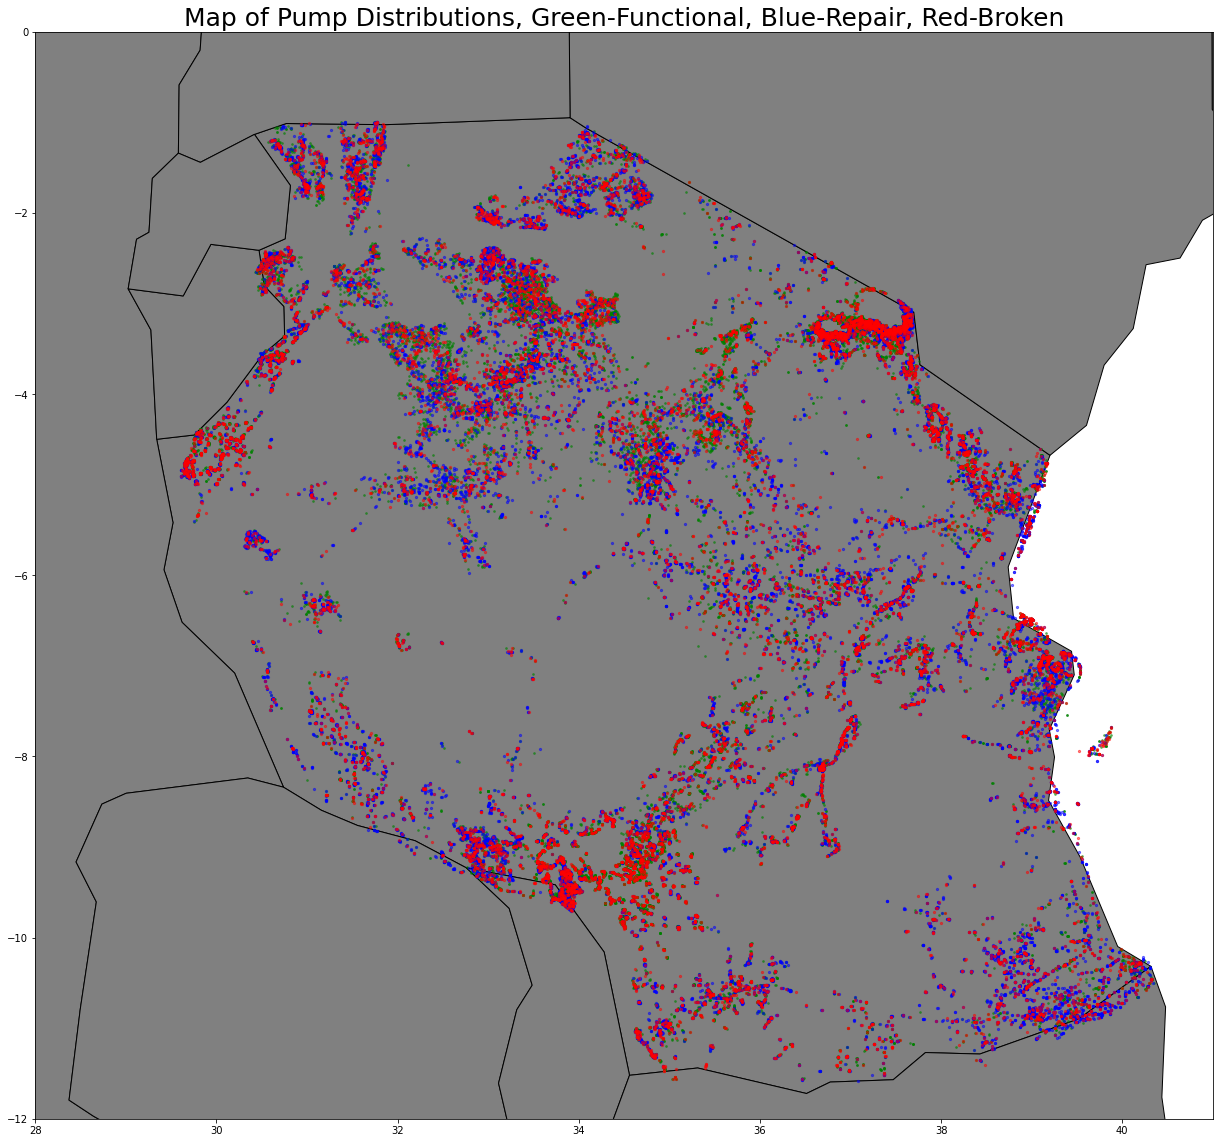

In [61]:
# let's make our imports
from pylab import rcParams
rcParams['figure.figsize'] = 30, 20
import geopandas
# let's visualize the data

import geopandas

gdf = geopandas.GeoDataFrame(df_1, geometry=geopandas.points_from_xy(df_1.longitude, df_1.latitude))

functional = gdf.where(gdf['status_group'] == 0)
repair = gdf.where(gdf['status_group'] == 2)
abandoned = gdf.where(gdf['status_group'] == 1)
broken = gdf.where(gdf['status_group'] == 3)



world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

# We restrict to Africa
ax = world[world.continent == 'Africa'].plot(
    color='gray', edgecolor='black')

ax.scatter(functional['longitude'], functional['latitude'],
           c='green',alpha=.5, s=3)

ax.scatter(repair['longitude'], repair['latitude'],
           c='blue', alpha=.5, s=5)

ax.scatter(broken['longitude'], broken['latitude'],
           c='red', alpha=.5, s=5)
plt.title("Map of Pump Distributions, Green-Functional, Blue-Repair, Red-Broken", fontsize = 25)

plt.ylim(-12, 0)
plt.xlim(28,41)

plt.show()

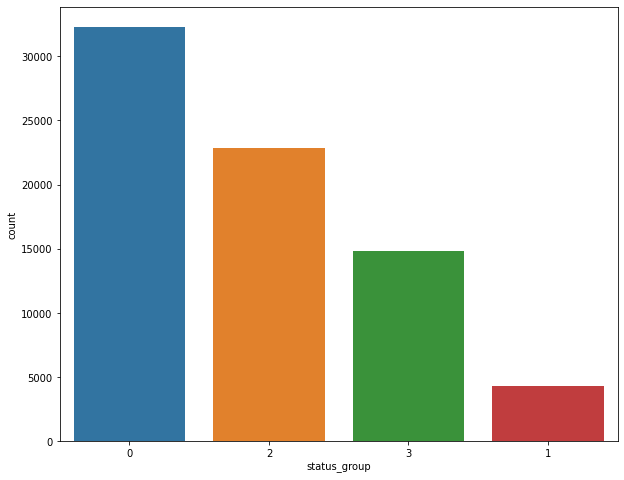

In [62]:
import warnings
warnings.filterwarnings("ignore")
#df_1["status_group"].unique()
#@title Checking for Class Imbalance
# visualizing the target variable
# print(train_labels["status_group"].unique())
rcParams['figure.figsize'] = 10, 8
imb = sns.countplot(df_1['status_group'],order = df_1['status_group'].value_counts().index)

**Observation**

There is class imbalance. A class imbalance is said to exist when observation in one class is higher than the observation in other classes. This is a common problem especially in classification problems because Imbalanced data can interfere with our model accuracy. Training the model using the dataset as is would make it get a high accuracy score just by predicting the majority class, but it would fail to capture the minority class, which is the point of creating the model in the first place.

### Random Sampling
* Let's address the class imbalance issue discovered during EDA by either adding more copies to the minority classes(Oversampling) or removing some observations of the majority class until the majority and minority classes are balanced out.

* The two sampling strategies we have to consider

> random under-sampling

> random over-sampling (this is what we'll use)

**Justification**

* It's important to note that undersampling can cost us valuable information, therefore after comparing pros and cons of both under and over sampling we concluded that oversampling was best suited for modeling given the size of the dataset.

* Oversampling is said to be a good choice when you don’t have a ton of data to work with(as is our case).Undersampling is better suited for big data. Another con to consider when undersampling is that it can cause overfitting and poor generalization to our test set.

## d) SMOTE for Balancing Data

In [64]:
# checking imlearn version 
print(imblearn.__version__)

0.8.1


In [83]:
# Dropping the Point column (Geometry) to enable us pass SMOTE
df_1 = df_1.drop(columns='geometry')

Class=0, n=32259 (25.000%)
Class=2, n=32259 (25.000%)
Class=1, n=32259 (25.000%)
Class=3, n=32259 (25.000%)


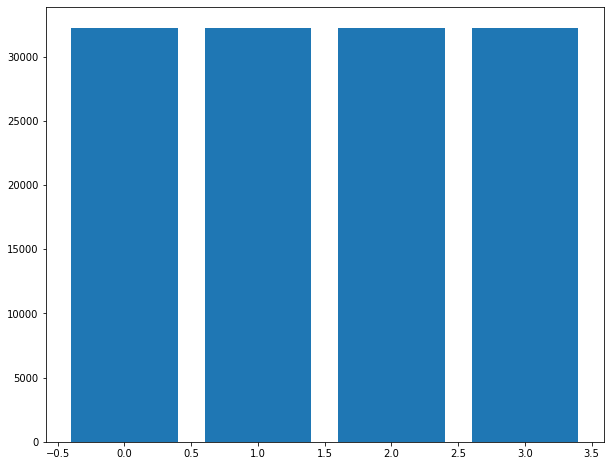

In [84]:

# Oversample and plot imbalanced dataset with SMOTE
# let's select our x and y variables
X = df_1.drop('status_group', axis = 1).astype(np.float64)
y = df_1['status_group']
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Our dataset is now balanced and ready for Modelling. All classes are equally distributed at 25%.

# Modelling

## Decision Tree Classifier

In [88]:
# let's import decision trees classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle = True, random_state=0)

model = tree.DecisionTreeClassifier()
model = model.fit(X_train, y_train)

predicted_value = model.predict(X_test)
print(predicted_value)
#%%
tree.plot_tree(model)

zeroes = 0
ones = 0
for i in range(0,len(y_train)):
    if y_train[i] == 0:
        zeroes +=1
    else:
        ones +=1
      
print(zeroes)
print(ones)

val = 1 - ((zeroes/70)*2 + (ones/70)*2)
print("Gini :-",val)
 
match = 0
UnMatch = 0
 
for i in range(30):
    if predicted_value[i] == y_test[i]:
        match += 1
    else:
        UnMatch += 1
         
accuracy = match/30
print("Accuracy is: ",accuracy)

[2 3 0 ... 1 0 2]


KeyError: ignored

Error in callback <function flush_figures at 0x7fab46499290> (for post_execute):


KeyboardInterrupt: ignored

Gini Index is a score that evaluates how accurate a split is among the classified groups. Gini index evaluates a score in the range between 0 and 1, where 0 is when all observations belong to one class, and 1 is a random distribution of the elements within classes. The gini score attained implies that the model is accurate with random distribution of values.

## XG BOOST Classifier

### Base Model

In [91]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# training XGboost on the training
classifier = XGBClassifier()
classifier.fit(x_train, y_train)

XGBClassifier(objective='multi:softprob')

In [92]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[5855  106  411    2]
 [ 694 5393  358   56]
 [1814  626 3923   39]
 [ 892  698  732 4209]]


0.7509299442033478

Using XGB Classifier, we get an accuracy score of 75.1% in classifying the 4 labels. In next step, we will apply cross validaton to see if the accuracy will improve.

### Cross Validation
>Cross-validation is a resampling method that uses different portions of the data to test and train a model on different iterations. It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice.

In [ ]:
# applying K-fold cross validation 
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

### HyperParameter Tuning
> Hyperparameter optimization or tuning is the problem of choosing a set of optimal hyperparameters for a learning algorithm. A hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are learned.

* Hyperparameters are certain values or weights that determine the learning process of an algorithm.

* XGBoost provides large range of hyperparameters. We can leverage the maximum power of XGBoost by tuning its hyperparameters.

* The most powerful ML algorithm like XGBoost is famous for picking up patterns and regularities in the data by automatically tuning thousands of learnable parameters.

* In tree-based models, like XGBoost the learnable parameters are the choice of decision variables at each node.

* XGBoost is a very powerful algorithm. So, it will have more design decisions and hence large hyperparameters. These are parameters specified by hand to the algo and fixed throughout a training phase.

* In tree-based models, hyperparameters include things like the maximum depth of the tree, the number of trees to grow, the number of variables to consider when building each tree, the minimum number of samples on a leaf and the fraction of observations used to build a tree.

* Generally, the XGBoost hyperparameters have been divided into 4 categories. They are as follows -

    1. General parameters

    2. Booster parameters

    3. Learning task parameters

    4. Command line parameters
* Before running a XGBoost model, we must set three types of parameters - general parameters, booster parameters and task parameters.

* The fourth type of parameters are command line parameters. They are only used in the console version of XGBoost. So, we will skip these parameters and limit our model to the first three type of parameters.


#### Bayesian Optimization with HYPEROPT

* Bayesian optimization is optimization or finding the best parameter for a machine learning or deep learning algorithm.

* Optimization is the process of finding a minimum of cost function , that determines an overall better performance of a model on both train-set and test-set.

* In this process, we train the model with various possible range of parameters until a best fit model is obtained.

* Hyperparameter tuning helps in determining the optimal tuned parameters and return the best fit model, which is the best practice to follow while building an ML or DL model.
* In this model, we will use Bayesian Optimization with HYPEROPT
* HYPEROPT is a powerful python library that search through an hyperparameter space of values and find the best possible values that yield the minimum of the loss function.

* Bayesian Optimization technique uses Hyperopt to tune the model hyperparameters. Hyperopt is a Python library which is used to tune model hyperparameters.

In [ ]:
# Initialize domain space for range of values
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [ ]:
# Objective function
def objective(space):
    clf=xgb.XGBClassifier(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [ ]:
# Optimization algorithm 
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

* Here best_hyperparams gives us the optimal parameters that best fit model and better loss function value.

* trials is an object that contains or stores all the relevant information such as hyperparameter, loss-functions for each set of parameters that the model has been trained.

* ‘fmin’ is an optimization function that minimizes the loss function and takes in 4 inputs - fn, space, algo and max_evals.

* Algorithm used is tpe.suggest.

In [ ]:
# Results
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

> The above result give best set of hyperparameters.

In [ ]:
# Lets train the model
import xgboost as xgb
 
# Creating the model
naive_model = xgb.XGBClassifier()
 
 
# Lets fit the model
 
naive_trained_model =  naive_model.fit(x_train,y_train)
# Lets make predictions using the train set
naive_prediction = naive_trained_model.predict(x_train)
 
# Lets check for the accuracy
 
accuracy = accuracy_score(naive_prediction, y_train)
accuracy
# Lets make predictions on the test data
naive_test_prediction = naive_trained_model.predict(x_test)
 
# Lets check for the accuracy
accuracy_2 = accuracy_score(naive_test_prediction,y_test)
accuracy_2
from sklearn.metrics import classification_report
 
report = classification_report(y_test,naive_test_prediction)
print(report)
#HyperParameter Tuning
# Creating the model
# tuned_model = xgb.XGBRFClassifier(n_estimators=700, max_depth=8, 
    #                               learning_rate=0.1, subsample=0.5)
tuned_model = xgb.XGBRFClassifier(n_estimators=850,learning_rate = 0.2,
                                  subsample= 0.55)
 
 
# Lets fit the model
 
htuned_model = tuned_model.fit(x_train,y_train)
# Lets make predictions using the train dataset
tuned_predictions = htuned_model.predict(x_train)
 
# Lets check for accuracy
accuracy = accuracy_score(tuned_predictions,y_train)
accuracy
# Lets make predictions using the test dataset
tuned_prediction = htuned_model.predict(x_test)
 
# Lets check for the accuracy
accuracy_ = accuracy_score(tuned_prediction,y_test)
accuracy_

              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.89      1.00      0.94         8

    accuracy                           0.95        20
   macro avg       0.94      0.96      0.95        20
weighted avg       0.96      0.95      0.95        20



0.85